In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

In [5]:
df = pd.read_csv('../Downloads/World-happiness-report-2024.csv',
                delimiter = ",").dropna().reset_index(drop = True)

In [6]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
135,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
136,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
137,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
138,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


## Zadanie 1

In [7]:
df.shape

(140, 12)

In [8]:
df.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
                                 ...   
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
Length: 12, dtype: object

## Zadanie 2

In [9]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.530893,5.644057,5.417700,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.181247,1.165108,1.198051,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.631750,4.762250,4.503750,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.800500,5.911000,5.676500,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.426250,6.515250,6.338250,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


## Zadanie 3

In [17]:
df.groupby("Regional indicator").describe()

Ladder score                                                             upperwhisker                                                           lowerwhisker                                                             Log GDP per capita                                              ... Freedom to make life choices                                         Generosity                                                             Perceptions of corruption                                                            Dystopia + residual                                                            
                                          count      mean       std    min      25%     50%      75%    max        count      mean       std    min     25%     50%     75%    max        count      mean       std    min      25%     50%      75%    max              count      mean       std    min      25%     50%  ...                          std    min      25%     50%      75%    max      count      mean       std    min      25%     50%      75%    max                     count      mean       std    min     25%     50%      75%    max               count      mean       std    min      25%     50%      75%    max
Regional indicator                                                                                                                                                                                                                                                                                                          ...                                                                                                                                                                                                                                                                                                                 
Central and Eastern Europe                 17.0  6.170941  0.494803  5.304  5.87700  6.2570  6.49100  6.822         17.0  6.267529  0.484845  5.440  5.9790  6.3320  6.5920  6.903         17.0  6.074235  0.505003  5.168  5.77500  6.1820  6.39000  6.741               17.0  1.637765  0.135296  1.364  1.53800  1.7000  ...                     0.094960  0.469  0.58100  0.6320  0.71700  0.805       17.0  0.135353  0.064969  0.041  0.08300  0.1270  0.17700  0.254                      17.0  0.089353  0.094332  0.000  0.0430  0.0680  0.11600  0.401                17.0  1.656706  0.370091  1.088  1.40000  1.6400  1.85800  2.307
Commonwealth of Independent States          9.0  5.567111  0.500692  4.873  5.18500  5.7140  5.81600  6.195          9.0  5.668222  0.492616  4.988  5.2830  5.7950  5.9300  6.303          9.0  5.465889  0.509060  4.758  5.08700  5.6320  5.71200  6.097                9.0  1.401000  0.184776  1.054  1.35000  1.4330  ...                     0.092278  0.551  0.65000  0.6800  0.73300  0.835        9.0  0.143111  0.095422  0.000  0.07700  0.1380  0.22500  0.285                       9.0  0.122333  0.074030  0.025  0.0440  0.1210  0.17400  0.215                 9.0  1.404667  0.320119  0.753  1.34900  1.4510  1.55100  1.795
East Asia                                   6.0  5.934333  0.398773  5.316  5.76525  6.0155  6.05950  6.503          6.0  6.022667  0.400796  5.403  5.8525  6.1025  6.1470  6.597          6.0  5.846333  0.396935  5.229  5.67875  5.9265  5.97400  6.410                6.0  1.700333  0.221848  1.353  1.56925  1.8005  ...                     0.087612  0.485  0.51450  0.5935  0.64475  0.704        6.0  0.122167  0.073052  0.023  0.08250  0.1290  0.14325  0.237                       6.0  0.200000  0.114240  0.055  0.1595  0.1830  0.21475  0.402                 6.0  1.340833  0.521769  0.333  1.30975  1.5320  1.63200  1.747
Latin America and Caribbean                19.0  6.143368  0.376936  5.607  5.83200  6.1880  6.35900  6.955         19.0  6.268263  0.368694  5.725  5.9565  6.3060  6.4730  7.051         19.0  6.018474  0.387784  5.489  5.67650  6.0700  6.25000  6.860               19.0  1.328211  0.3

## Zadanie 4

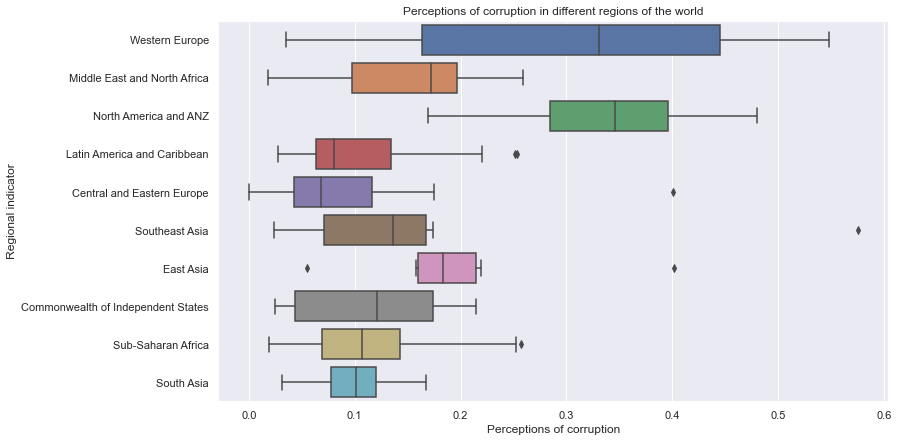

In [27]:
sns.boxplot(data = df, x = 'Perceptions of corruption', y = "Regional indicator").set_title("Perceptions of corruption in different regions of the world")
plt.show()

Z Europie zachodniej mamy największą rozpiętość w postrzeganu poziomu korupcji w sektorze publicznym. Najmniejsza mediana jest w centralnej i wschodniej Europie. W Azji Południowo Wschodniej mamy największy outlier. 

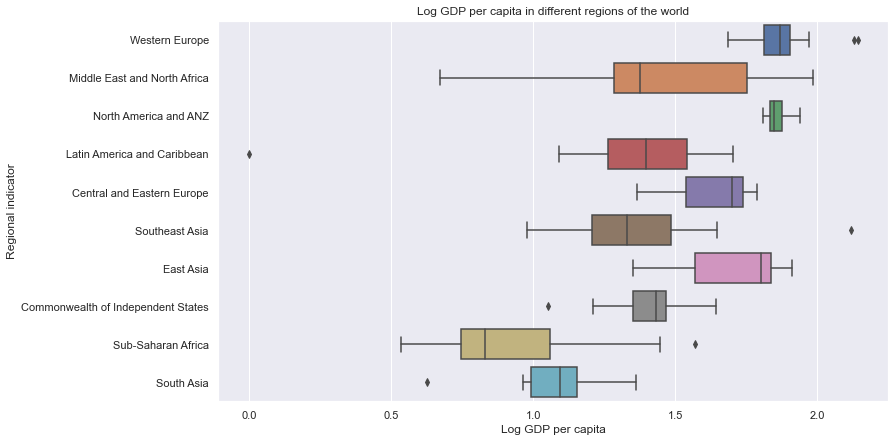

In [43]:
sns.boxplot(data = df, x = 'Log GDP per capita', y = "Regional indicator").set_title("Log GDP per capita in different regions of the world")
plt.show()

W środkowej i północnej Afryce mamy największą rozpiętość w PKB na jednego mieszkańca. W Europie zachodniej mediana PKB na mieszkańca jest największa i są największe outliery. Średnio najmniejsze jest w Afryce Subsaharyjskiej.

## Zadanie 5

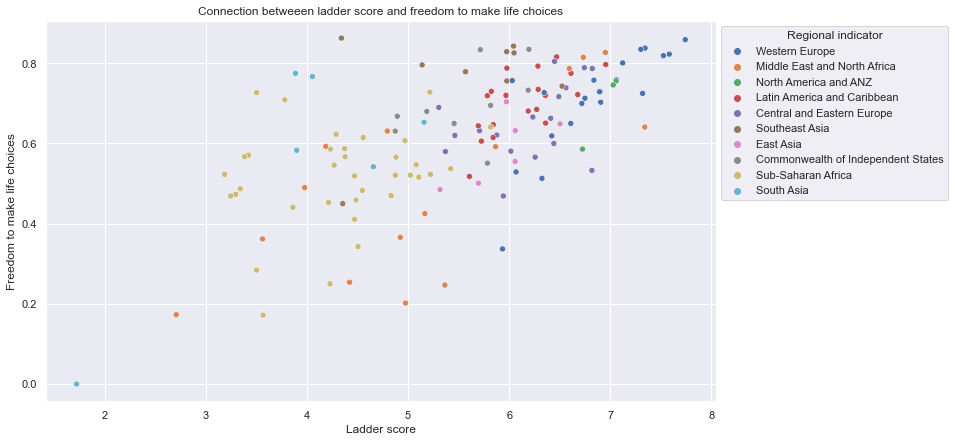

In [66]:
plot = sns.scatterplot(data=df, x='Ladder score', y='Freedom to make life choices', hue = "Regional indicator")
sns.move_legend(plot,"upper left", bbox_to_anchor=(1, 1))
plot.set_title("Connection betweeen ladder score and freedom to make life choices")
plt.show()

Im większa wolnośc w podejmowaniu decyzji tym wyższa pozycja szczęścia w krajach. Państwa z Europy zajmują najwyższe pozycje i tam też wolność w podejmowaniu pozycji jest największa. W krajach Afryki jest najmniejsza wolność wyboru i najmniejszy poziom szczęścia.

In [77]:
df1 = df[df["Regional indicator"] == "Central and Eastern Europe"]
pkmn_type_colors = ['#78C850',  
                    '#F08030',  
                    '#6890F0',  
                    '#A8B820',  
                    '#A8A878',  
                    '#A040A0',  
                    '#F8D030',  
                    '#E0C068',  
                    '#EE99AC',  
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8', 
                    '#b3d5a4',
                    '#7f5366',
                   ]

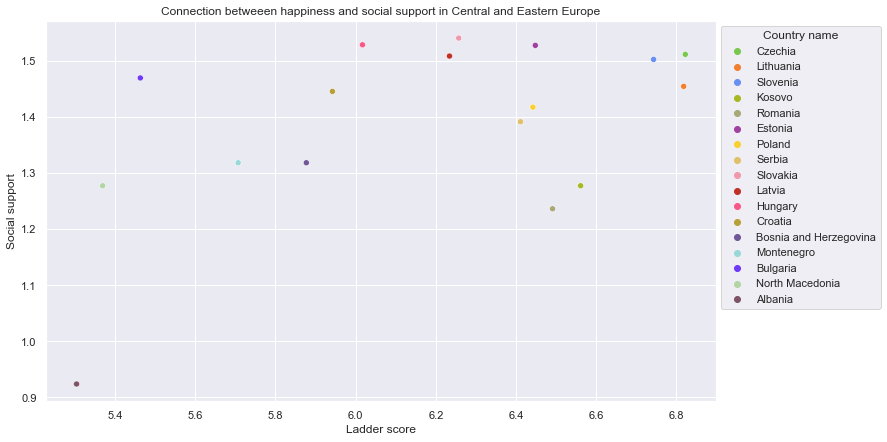

In [78]:
plot = sns.scatterplot(data=df1, x='Ladder score', y='Social support',hue = "Country name", palette=pkmn_type_colors)
sns.move_legend(plot,"upper left", bbox_to_anchor=(1, 1))
plot.set_title("Connection betweeen happiness and social support in Central and Eastern Europe")
plt.show()

W krajach Europy centralnej i wschodniej, poziom szczęścia nie wpływa na to czy ludzie mogą polegać na wsparciu bliskich. Jedynym odstępstwem jest Albania, gdzie zarówno "social support" jak i "ladder score" mają najniższe poziomy.